In [141]:
import os
import csv

# Define the folders for each category
folders = {
    'Agriculture': '/home/bikash/Desktop/keras/NLP5/nepali_news_dataset_20_categories_large/nepali_news_dataset_20_categories_large/Agriculture',
    'Automobiles': '/home/bikash/Desktop/keras/NLP5/nepali_news_dataset_20_categories_large/nepali_news_dataset_20_categories_large/Automobiles',
    'Bank': '/home/bikash/Desktop/keras/NLP5/nepali_news_dataset_20_categories_large/nepali_news_dataset_20_categories_large/Bank',
    'Blog': '/home/bikash/Desktop/keras/NLP5/nepali_news_dataset_20_categories_large/nepali_news_dataset_20_categories_large/Blog',
    'Business': '/home/bikash/Desktop/keras/NLP5/nepali_news_dataset_20_categories_large/nepali_news_dataset_20_categories_large/Business',
    'Economy': '/home/bikash/Desktop/keras/NLP5/nepali_news_dataset_20_categories_large/nepali_news_dataset_20_categories_large/Economy',
    'Education': '/home/bikash/Desktop/keras/NLP5/nepali_news_dataset_20_categories_large/nepali_news_dataset_20_categories_large/Education',
    'Employment': '/home/bikash/Desktop/keras/NLP5/nepali_news_dataset_20_categories_large/nepali_news_dataset_20_categories_large/Employment',
    'Entertainment': '/home/bikash/Desktop/keras/NLP5/nepali_news_dataset_20_categories_large/nepali_news_dataset_20_categories_large/Entertainment',
    'Health': '/home/bikash/Desktop/keras/NLP5/nepali_news_dataset_20_categories_large/nepali_news_dataset_20_categories_large/Health',
    'Interview': '/home/bikash/Desktop/keras/NLP5/nepali_news_dataset_20_categories_large/nepali_news_dataset_20_categories_large/Interview',
    'Literature': '/home/bikash/Desktop/keras/NLP5/nepali_news_dataset_20_categories_large/nepali_news_dataset_20_categories_large/Literature',
    'Migration': '/home/bikash/Desktop/keras/NLP5/nepali_news_dataset_20_categories_large/nepali_news_dataset_20_categories_large/Migration',
    'Opinion': '/home/bikash/Desktop/keras/NLP5/nepali_news_dataset_20_categories_large/nepali_news_dataset_20_categories_large/Opinion',
    'Politics': '/home/bikash/Desktop/keras/NLP5/nepali_news_dataset_20_categories_large/nepali_news_dataset_20_categories_large/Politics',
    'Society': '/home/bikash/Desktop/keras/NLP5/nepali_news_dataset_20_categories_large/nepali_news_dataset_20_categories_large/Society',
    'Sports': '/home/bikash/Desktop/keras/NLP5/nepali_news_dataset_20_categories_large/nepali_news_dataset_20_categories_large/Sports',
    'Technology': '/home/bikash/Desktop/keras/NLP5/nepali_news_dataset_20_categories_large/nepali_news_dataset_20_categories_large/Technology',
    'Tourism': '/home/bikash/Desktop/keras/NLP5/nepali_news_dataset_20_categories_large/nepali_news_dataset_20_categories_large/Tourism',
    'World':'/home/bikash/Desktop/keras/NLP5/nepali_news_dataset_20_categories_large/nepali_news_dataset_20_categories_large/World'
}

# Define the CSV file to write to
csv_file = 'news_data_kaggle.csv'

# Define the CSV header
header = ['Category', 'News']

# Open the CSV file in write mode
with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file, escapechar='\\', quoting=csv.QUOTE_MINIMAL)
    
    # Write the header
    writer.writerow(header)
    
    # Iterate over each category and its folder
    for category, folder in folders.items():
        # List all files in the folder
        for filename in os.listdir(folder):
            if filename.endswith('.txt'):  # Assuming news articles are in text files
                file_path = os.path.join(folder, filename)
                try:
                    with open(file_path, 'r', encoding='utf-8') as f:
                        content = f.read()
                except UnicodeDecodeError:
                    try:
                        with open(file_path, 'r', encoding='latin-1') as f:
                            content = f.read()
                    except UnicodeDecodeError:
                        print(f"Could not read file: {file_path}")
                        continue
                
                # Write the row to the CSV file
                writer.writerow([category, content])

print(f"CSV file '{csv_file}' has been created successfully.")


CSV file 'news_data_kaggle.csv' has been created successfully.


In [142]:
import pandas as pd
import re
df=pd.read_csv('news_data_kaggle.csv')
df

,Category,News
0,Agriculture,भर्खरै रोपेको धानमा विभिन्न रोगको प्रकोप देखिन...
1,Agriculture,ÿþ5\tH\t \tM\t \t>\t(\t?\t\t9\t0\tB\t2\tG\t
2,Agriculture,सन् २०१० मा रोजगारीको क्रममा कतार पुगेका खेम प...
3,Agriculture,ÿþ\t9\t2\t?\t\t\t>\t
4,Agriculture,हाँका एक व्यक्तिले १० बिगाहा जमिनमा व्यावसायिक...
...,...,...
6968,World,ÿþ\t0\tA\t#\t>\t(\t?\t'\t?\t\tK\t
6969,World,"\n﻿फेब्रुअरी १७ ,२०१५, अमेरिका - यस नेपाल अमेर..."
6970,World,"\n﻿सिरहा, ३० कार्तिक । सिरहाको कर्जन्हाका क्या..."
6971,World,ÿþ-\tG\t(\tG\t \tA\t\t2\t>\t\t>\t


In [143]:
# Function to clean the text
def clean_text(text):
    if isinstance(text, str):
        # Remove unwanted symbols and characters, keep only Nepali characters and whitespace
        cleaned_text = re.sub(r'[^\u0900-\u097F\s]', '', text)
        # Remove newline characters
        cleaned_text = cleaned_text.replace('\n', '')
        cleaned_text = cleaned_text.replace('\t', '')
        return cleaned_text.strip()
    return ''  # Return an empty string if the text is not a string

# Apply the cleaning function to the News column
df['News'] = df['News'].apply(clean_text)


In [144]:
# Remove rows where 'content' is empty
df = df[df['News'] != '']

In [145]:
df = df.sample(frac = 1)
df

,Category,News
2841,Entertainment,उषा पाण्डे। सेताेपर्दापछिल्लो समयका चर्चित कवि...
5829,Sports,विद्युत् प्राधिकरणले चुहावट नियन्त्रण अभियान स...
5254,Politics,राजविराज २४ माघ । मधेशी जनअधिकार फोरम नेपाल लो...
1866,Economy,१६ पुस चितवन । नेपालमा गत एक वर्षमा २४ अर्ब रु...
5931,Sports,जर्मनीलाई उपाधि रक्षाको चुनौतीविश्वकप फुटबलमा ...
...,...,...
2830,Entertainment,हल्ला चलेछ गीतमार्फत आफू अमेरिकामा पलायन नभएको...
6153,Sports,स्थापनाको आधा दसकपछि त्रिभुवन विश्वविद्यालय आफ...
3554,Interview,केही क्षेत्र मात्र नभई पूरै मुलुक दुष्ट सिन्डि...
4957,Politics,राजविराज १२ चैत । सप्तरीको राजविराज स्थित देशक...


In [151]:
df.to_csv('cleaned_news_dataset.csv',index=False)  # Use '\t' for tab-separated values

In [152]:
df=pd.read_csv('cleaned_news_dataset.csv')
df

,Unnamed: 0,Category,News
0,2841,Entertainment,उषा पाण्डे। सेताेपर्दापछिल्लो समयका चर्चित कवि...
1,5829,Sports,विद्युत् प्राधिकरणले चुहावट नियन्त्रण अभियान स...
2,5254,Politics,राजविराज २४ माघ । मधेशी जनअधिकार फोरम नेपाल लो...
3,1866,Economy,१६ पुस चितवन । नेपालमा गत एक वर्षमा २४ अर्ब रु...
4,5931,Sports,जर्मनीलाई उपाधि रक्षाको चुनौतीविश्वकप फुटबलमा ...
...,...,...,...
5415,2830,Entertainment,हल्ला चलेछ गीतमार्फत आफू अमेरिकामा पलायन नभएको...
5416,6153,Sports,स्थापनाको आधा दसकपछि त्रिभुवन विश्वविद्यालय आफ...
5417,3554,Interview,केही क्षेत्र मात्र नभई पूरै मुलुक दुष्ट सिन्डि...
5418,4957,Politics,राजविराज १२ चैत । सप्तरीको राजविराज स्थित देशक...


In [90]:
a=df['Category']=='Business'
a.shape[0]

5420

In [91]:
df.shape

(5420, 2)

In [92]:
set(df['Category'])

{'Agriculture',
 'Automobiles',
 'Bank',
 'Blog',
 'Business',
 'Economy',
 'Education',
 'Employment',
 'Entertainment',
 'Interview',
 'Literature',
 'Migration',
 'Opinion',
 'Politics',
 'Society',
 'Sports',
 'Technology',
 'Tourism',
 'World'}

In [93]:
l_Agricutlure = len(df[df['Category'] == 'Agriculture'])
l_Automobiles = len(df[df['Category'] == 'Automobiles'])
l_Bank = len(df[df['Category'] == 'Bank'])
l_Blog = len(df[df['Category'] == 'Blog'])
l_Business = len(df[df['Category'] == 'Business'])
l_Economy = len(df[df['Category'] == 'Economy'])
l_Education = len(df[df['Category'] == 'Education'])
l_Employment = len(df[df['Category'] == 'Employment'])
l_Entertainment = len(df[df['Category'] == 'Entertainment'])
l_Interview = len(df[df['Category'] == 'Interview'])
l_Literature = len(df[df['Category'] == 'Literature'])
l_Migration = len(df[df['Category'] == 'Opinion'])
l_Politics = len(df[df['Category'] == 'Politics'])
l_Society = len(df[df['Category'] == 'Society'])
l_Sports = len(df[df['Category'] == 'Sports'])
l_Technology = len(df[df['Category'] == 'Technology'])
l_Tourism = len(df[df['Category'] == 'Tourism'])
l_World = len(df[df['Category'] == 'World'])


In [94]:
l_Business

187

In [95]:
import plotly.graph_objects as go
categories=['Agriculture','Automobiles','Bank','Blog','Business','Economy','Education','Employment','Entertainment','Interview','Literature','Migration','Opinion','Politics','Society','Sports','Technology','Tourism','World']

fig = go.Figure([go.Bar(x=categories, y=[l_Agricutlure,l_Automobiles,l_Bank,l_Blog,l_Business,l_Economy,l_Education,l_Employment,l_Entertainment,l_Interview,l_Literature,l_Migration,l_Opinion,l_Politics,l_Society,l_Sports,l_Technology,l_Tourism,l_World])])
fig.show()

In [96]:
import tensorflow
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from sklearn.preprocessing import LabelBinarizer

In [97]:
l_data = len(df)
train_size = int(l_data*0.95)
train_news = df['News'][0:train_size]
train_category = df['Category'][0:train_size]


test_news = df['News'][train_size:]
test_category = df['Category'][train_size:]

In [98]:
num_classes = 19
vocab_size = 15000
batch_size =10

tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(train_news)

x_train = tokenizer.texts_to_matrix(train_news,mode = 'tfidf')
x_test = tokenizer.texts_to_matrix(test_news,mode = 'tfidf')


In [99]:
x_train

array([[0.        , 3.88950082, 3.43456379, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.84918896, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 2.1763218 , 2.02641482, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 1.75028333, 0.84918896, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.99021576, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.99021576, 1.43780189, ..., 0.        , 0.        ,
        0.        ]])

In [100]:
encoder =  LabelBinarizer()
encoder.fit(train_category)
y_train = encoder.transform(train_category)
# print(len(y_train[0]))
# print(y_train)
y_test = encoder.transform(test_category)

In [101]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential()
# Padding = 'same'  results in padding the input such that
# the output has the same length as the original input

model.add(Dense(1024,input_shape =(x_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.25))


model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))


model.add(Dense(num_classes))
model.add(Activation('softmax'))



print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 1024)              15361024  
                                                                 
 activation_15 (Activation)  (None, 1024)              0         
                                                                 
 dropout_12 (Dropout)        (None, 1024)              0         
                                                                 
 dense_16 (Dense)            (None, 512)               524800    
                                                                 
 activation_16 (Activation)  (None, 512)               0         
                                                                 
 dropout_13 (Dropout)        (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 256)              

In [102]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [103]:
history = model.fit(x_train,y_train,
                    batch_size = batch_size,
                    epochs = 50,
                    verbose = 1,
                    validation_split = 0.1)

Epoch 1/50
464/464 [==============================] - 28s 60ms/step - loss: 2.0740 - accuracy: 0.4219 - val_loss: 1.3952 - val_accuracy: 0.6058
Epoch 2/50
464/464 [==============================] - 27s 59ms/step - loss: 1.0911 - accuracy: 0.7016 - val_loss: 1.1802 - val_accuracy: 0.7010
Epoch 3/50
464/464 [==============================] - 27s 58ms/step - loss: 0.6612 - accuracy: 0.8263 - val_loss: 1.0902 - val_accuracy: 0.7107
Epoch 4/50
464/464 [==============================] - 28s 60ms/step - loss: 0.4001 - accuracy: 0.8953 - val_loss: 1.2978 - val_accuracy: 0.7068
Epoch 5/50
464/464 [==============================] - 27s 59ms/step - loss: 0.2990 - accuracy: 0.9193 - val_loss: 1.6031 - val_accuracy: 0.7262
Epoch 6/50
464/464 [==============================] - 28s 60ms/step - loss: 0.2279 - accuracy: 0.9454 - val_loss: 1.8954 - val_accuracy: 0.7184
Epoch 7/50
464/464 [==============================] - 27s 59ms/step - loss: 0.2290 - accuracy: 0.9394 - val_loss: 2.0876 - val_accuracy:

In [104]:
test_score = model.evaluate(x_test,y_test,batch_size = batch_size,verbose = 1)
test_score

28/28 [==============================] - 0s 6ms/step - loss: 12.5816 - accuracy: 0.7269


[12.581564903259277, 0.7269372940063477]

In [105]:
text_classes = encoder.classes_
text_classes

array(['Agriculture', 'Automobiles', 'Bank', 'Blog', 'Business',
       'Economy', 'Education', 'Employment', 'Entertainment', 'Interview',
       'Literature', 'Migration', 'Opinion', 'Politics', 'Society',
       'Sports', 'Technology', 'Tourism', 'World'], dtype='<U13')

In [106]:
   
for i in range(4,20):
  prediction = model.predict(np.array([x_test[i]]))
  predicted_classes = text_classes[np.argmax(prediction[0])]

  print(test_news.iloc[i])
  print('Actual label = ',test_category.iloc[i])
  print("Preticted label = ", predicted_classes)



1/1 [==============================] - 0s 86ms/step
हास्य कलाकार जितु नेपाल मुन्द्रे नेपाल वायु सेवा निगमको दूतका रुपमा नियुक्त भएका छन् ।निगमले सोमबार आफ्नो तीन वर्षे सुधार कार्य योजना प्रस्तुत गर्दै मुन्द्रेलाई ब्राण्ड एम्बेस्डरमा नियुक्त गरेको हो । एक कार्यक्रमकाबीच पर्यटनमन्त्री आनन्दप्रसाद पोख्रेलले मुन्द्रेलाई निगमको नियुक्ति पत्र हस्तान्तरण गरेका थिए ।कार्यक्रममा बोल्दै जितुले वायुसेवा निगमको प्रचारमा सक्दो सहयोग गर्ने प्रतिबद्धता व्यक्त गरेका छन् । सरकारको तर्फबाट अहिलेसम्मकै ठूलो जिम्मेवारी पाएकोमा खुशि व्यक्त गर्दै उनले भने निगमले आफ्नो सेवालाई चुस्त दुरुस्त बनाउन आवश्यक छ ।निगमलाई यसअघि निकै व्यंग्य गरिएको सम्झना गर्दै मुन्द्रेले अब भने राष्ट्रिय ध्वजाबाहक जहाजमा यात्रा गर्न सबैलाई सिफारीस गर्ने संकल्प गरेका छन् । नेपाली अर्थतन्त्र र पर्यटन क्षेत्रको विकासमा वायु सेवा निगमको ठूलो भूमीका हुने भन्दै उनले सेवा विस्तार गर्नु पर्ने आवश्यकता पनि औल्याए ।
Actual label =  Entertainment
Preticted label =  Tourism
1/1 [==============================] - 0s 20ms/step
आश्विन २२ २०७४नेपाल

In [107]:

df_hist = pd.DataFrame(history.history)
df_hist

,loss,accuracy,val_loss,val_accuracy
0,2.074050,0.421882,1.395230,0.605825
1,1.091144,0.701554,1.180167,0.700971
2,0.661223,0.826284,1.090233,0.710680
3,0.400133,0.895339,1.297835,0.706796
4,0.299031,0.919292,1.603078,0.726214
5,0.227928,0.945404,1.895379,0.718447
6,0.229034,0.939361,2.087592,0.704854
7,0.205582,0.948425,1.938810,0.693204
8,0.177483,0.953604,2.550145,0.683495
9,0.220949,0.946698,2.809619,0.691262


[]

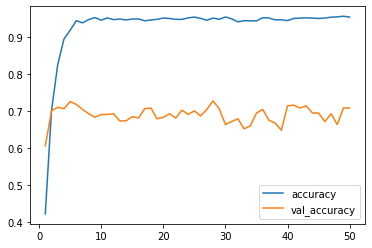

In [108]:
from matplotlib import pyplot as plt
plt.plot([i for i in range(1,51)],df_hist['accuracy'],label = 'accuracy')
plt.plot([i for i in range(1,51)],df_hist['val_accuracy'],label= 'val_accuracy')
plt.legend()
plt.plot()

[]

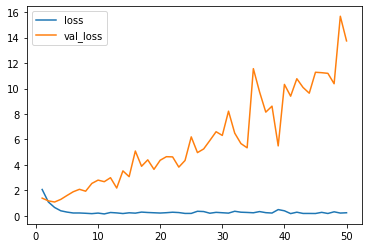

In [109]:
from matplotlib import pyplot as plt
plt.plot([i for i in range(1,51)],df_hist['loss'],label = 'loss')
plt.plot([i for i in range(1,51)],df_hist['val_loss'],label= 'val_loss')
plt.legend()
plt.plot()

In [110]:
#to save model
import pickle
model.save('/home/bikash/Desktop/keras/NLP5/Kaggle_news_classification.h5')

# to save Tokenizer ie Vocabulary
with open('/home/bikash/Desktop/keras/NLP5/Kaggle_news_classification.pickle','wb') as f:
  pickle.dump(tokenizer,f,protocol = pickle.HIGHEST_PROTOCOL)

In [111]:
# load model
from tensorflow.keras.models import load_model
model = load_model('/home/bikash/Desktop/keras/NLP5/Kaggle_news_classification.h5')

#load pickle file
tokenizer = Tokenizer()
with open('/home/bikash/Desktop/keras/NLP5/Kaggle_news_classification.pickle','rb') as f:
  tokenizer = pickle.load(f)



In [112]:
import numpy as np
from pathlib import Path
text_file = ['/home/bikash/Desktop/keras/NLP5/nepalinews.txt']
x_data = []
for i in text_file:
  i_path = Path(i).read_text()
  x_data.append(i_path)

x_data_series = pd.Series(x_data)
print(x_data_series)
x_tokenized = tokenizer.texts_to_matrix(x_data_series,mode = 'tfidf')

for x_t in x_tokenized:
  prediction = model.predict(np.array([x_t]))
  predicted_classes = text_classes[np.argmax(prediction[0])]
  print(prediction)
  print(f"The text you provided falls on  :{predicted_classes}")
  # print('Actual label = ',test_category.iloc[i])
  # print("Preticted label = ", predicted_classes)

0    नेपाली कांग्रेसका केन्द्रीय सदस्य सुरेन्द्र पा...
dtype: object
1/1 [==============================] - 0s 54ms/step
[[4.28133470e-24 2.31279366e-28 2.07953365e-22 1.87527244e-22
  1.46442335e-16 6.44157373e-17 3.36991140e-21 7.76867754e-27
  1.83645748e-21 2.21836502e-18 1.02995546e-20 8.68310944e-17
  4.90896886e-16 1.00000000e+00 4.59094293e-16 1.20957582e-22
  3.23368013e-25 3.57764843e-19 4.73630694e-19]]
The text you provided falls on :Politics
